In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
try:
    import empyrical as emp
except:
    emp = None
import tushare as ts
import time
import datetime
import random
import seaborn as sns

from common.config import Config
from spider.spider_nasdaq import Spider_nasdaq
from spider.spider_coinmarketcap import Spider_coinmarketcap

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from pandas_highcharts.core import serialize
from pandas_highcharts.display import display_charts

400

,BUY_N,SELL_N,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
0,10,10,101,4.963730,2.399585,-0.417325,-0.724579,0.425743,0.533333,0.143584
1,10,20,69,4.156645,2.584264,-0.483839,-0.724579,0.420290,0.533333,0.131575
2,10,30,54,5.018359,2.717307,-0.513616,-0.724579,0.351852,0.600000,0.145293
3,10,40,46,4.288583,2.554249,-0.571196,-0.724579,0.347826,0.400000,0.134588
4,10,50,40,4.735575,2.583906,-0.571859,-0.724579,0.375000,0.533333,0.142044


,BUY_N,SELL_N,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,4.000000e+02,400.000000,400.000000,400.000000
mean,105.000000,105.000000,12.457500,5.565247,2.517920,-0.441862,-7.245794e-01,0.572480,0.363583,0.153857
std,57.735027,57.735027,10.935821,2.048552,0.190374,0.114208,5.077440e-15,0.121710,0.093626,0.028200
min,10.000000,10.000000,5.000000,1.682959,2.136527,-0.648733,-7.245794e-01,0.230769,0.200000,0.081776
25%,57.500000,57.500000,6.000000,3.977888,2.380701,-0.525214,-7.245794e-01,0.500000,0.285714,0.134266
50%,105.000000,105.000000,8.000000,5.446387,2.567181,-0.460175,-7.245794e-01,0.571429,0.333333,0.156233
75%,152.500000,152.500000,15.000000,7.150054,2.656503,-0.366158,-7.245794e-01,0.666667,0.466667,0.176554
max,200.000000,200.000000,101.000000,10.307833,2.832171,-0.182239,-7.245794e-01,0.875000,0.600000,0.206584


,BUY_N,SELL_N,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
123,70,40,15,8.485597,2.827624,-0.394058,-0.724579,0.533333,0.533333,0.187813
124,70,50,13,9.473521,2.827624,-0.366527,-0.724579,0.615385,0.533333,0.196850
143,80,40,13,9.923634,2.554837,-0.297004,-0.724579,0.615385,0.533333,0.201378
144,80,50,12,9.960737,2.554837,-0.297645,-0.724579,0.666667,0.533333,0.201691
163,90,40,11,10.226168,2.380701,-0.296302,-0.724579,0.727273,0.533333,0.204582
164,90,50,11,9.943769,2.380701,-0.318253,-0.724579,0.727273,0.533333,0.202222
166,90,70,10,7.828259,2.380701,-0.348021,-0.724579,0.500000,0.533333,0.182508
183,100,40,11,10.178304,2.474055,-0.298891,-0.724579,0.727273,0.533333,0.204872
184,100,50,11,9.924063,2.474055,-0.320824,-0.724579,0.727273,0.533333,0.202733
186,100,70,10,7.789527,2.474055,-0.350653,-0.724579,0.500000,0.533333,0.182714


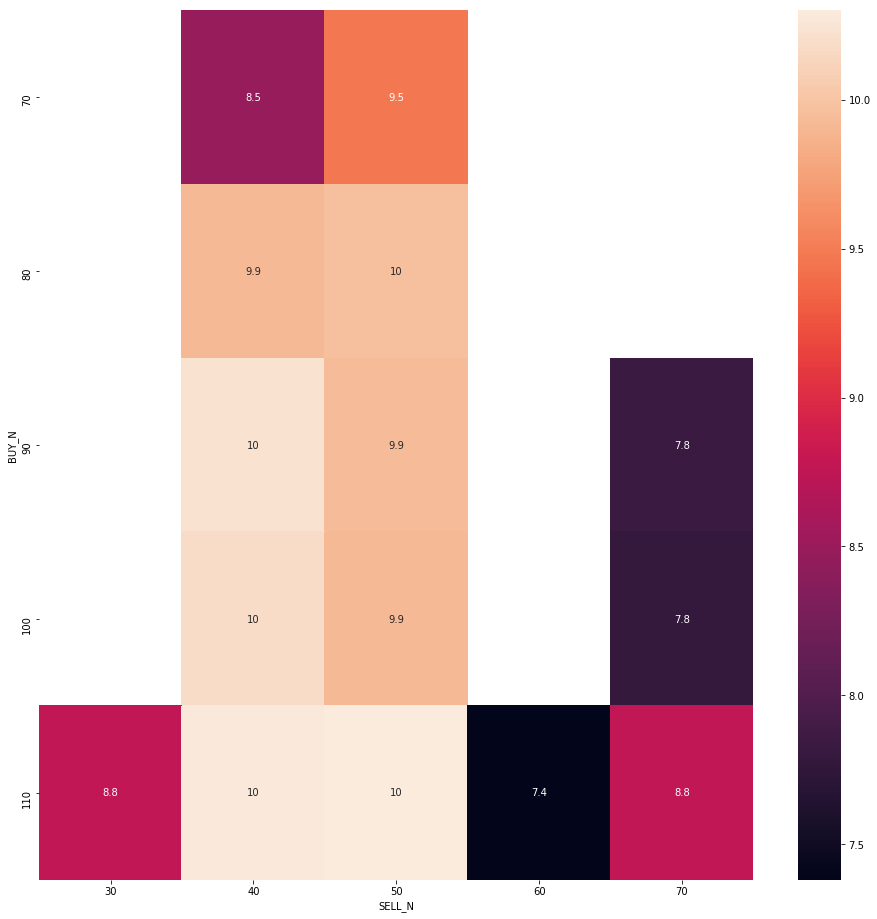

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/399300-2005-2019-TT-PARAMTEST-20190518221407.csv')
len(df)
# df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
# df.columns
df = df.loc[:, ['BUY_N', 'SELL_N', 'ORDER', 'RETURN_ALGO', 'RETURN_BENC', 'MAXDROPDOWN_ALGO', 'MAXDROPDOWN_BENC', 'WINRATE_ORDER', 'WINRATE_YEARLY', 'ANNUAL_RETURN']]
df.head()
df.describe()

md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['75%']
df = df[df['RETURN_ALGO'] > md]
# df
md = df['WINRATE_YEARLY'].describe(percentiles=[.75, .90, .95])['75%']
df = df[df['WINRATE_YEARLY'] > md]
df

heat_df = df.pivot(index='BUY_N', columns='SELL_N', values='RETURN_ALGO')
# heat_df
ax = sns.heatmap(heat_df, annot=True)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/161017-2012-2019-MA-PARAMTEST-20190306.csv')
len(df)
df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
df.head()
df.describe()

md = df['RETURN'].describe(percentiles=[.75, .90, .95])['75%']
df = df[df['RETURN'] > md]

heat_df = df.pivot(index='ROLLMAX', columns='ROLLMIN', values='RETURN')
heat_df
ax = sns.heatmap(heat_df, annot=True)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/2005-2019-399300-TT-PARAMTEST-20190305.csv')
len(df)
df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
df.head()
df.describe()

md = df['RETURN'].describe(percentiles=[.75, .90, .95])['75%']
df = df[df['RETURN'] > md]

heat_df = df.pivot(index='ROLLMAX', columns='ROLLMIN', values='RETURN')
heat_df
ax = sns.heatmap(heat_df, annot=True)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/2005-2019-399300-MA-PARAMTEST-20190305.csv')
len(df)
df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
df.head()
df.describe()

md = df['RETURN'].describe(percentiles=[.75, .90, .95])['75%']
df = df[df['RETURN'] > md]

heat_df = df.pivot(index='ROLLMAX', columns='ROLLMIN', values='RETURN')
heat_df
ax = sns.heatmap(heat_df, annot=True)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/000905-2007-2019-TT-PARAMTEST-20190306.csv')
len(df)
df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
df.head()
df.describe()

md = df['RETURN'].describe(percentiles=[.75, .90, .95])['75%']
df = df[df['RETURN'] > md]

heat_df = df.pivot(index='ROLLMAX', columns='ROLLMIN', values='RETURN')
heat_df
ax = sns.heatmap(heat_df, annot=True)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/000905-2007-2019-MA-PARAMTEST-20190307.csv')
len(df)
df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
df.head()
df.describe()

# md = df['RETURN'].describe(percentiles=[.75, .90, .95])['75%']
# df = df[df['RETURN'] > md]
df[df['RETURN'] > df['RETURN'].describe(percentiles=[.75, .90, .95])['75%']]

heat_df = df.pivot(index='ROLLMAX', columns='ROLLMIN', values='RETURN')
heat_df
ax = sns.heatmap(heat_df, annot=True)